Training images: (60000, 28, 28)
Testinag images : (10000, 28, 28)
Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 27s 60ms/step - accuracy: 0.8726 - loss: 0.4644 - val_accuracy: 0.9820 - val_loss: 0.0734
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 68ms/step - accuracy: 0.9801 - loss: 0.0688 - val_accuracy: 0.9860 - val_loss: 0.0534
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 37s 58ms/step - accuracy: 0.9864 - loss: 0.0454 - val_accuracy: 0.9868 - val_loss: 0.0485
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 24s 57ms/step - accuracy: 0.9912 - loss: 0.0308 - val_accuracy: 0.9877 - val_loss: 0.0437
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9927 - loss: 0.0249 - val_accuracy: 0.9878 - val_loss: 0.0443
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.9822 - loss: 0.0534
Test Accuracy: 0.9868999719619751


Saving thala.jpg to thala.jpg


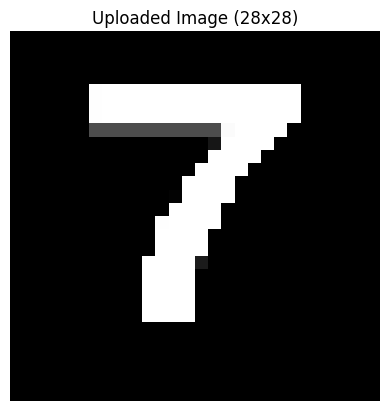

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
Predicted Digit: 2


In [3]:
#Introduction to Dl for Image classification

import numpy as np
import matplotlib.pyplot as plt
import cv2

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

from google.colab import files

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training images:", X_train.shape)
print("Testinag images :", X_test.shape)

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.fit(
    X_train, y_train,
    epochs=5,
    batch_size=128,
    validation_split=0.1
)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

uploaded = files.upload()

for file_name in uploaded.keys():
    img = cv2.imread(file_name)

    if len(img.shape) == 3:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        img_gray = img

    img_resized = cv2.resize(img_gray, (28, 28))
    img_resized = 255 - img_resized
    img_resized = img_resized / 255.0

    img_input = img_resized.reshape(1, 28, 28, 1)

    plt.imshow(img_resized, cmap='gray')
    plt.title("Uploaded Image (28x28)")
    plt.axis('off')
    plt.show()

    prediction = model.predict(img_input)
    predicted_digit = np.argmax(prediction)

    print("Predicted Digit:", predicted_digit)